In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from scipy import integrate

In [2]:
def rk4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2., t[i] + h / 2., *args)
        k3 = f(y[i] + k2 * h / 2., t[i] + h / 2., *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i+1] = y[i] + (h / 6.) * (k1 + 2*k2 + 2*k3 + k4)
    return t, y

In [3]:
def MyModel_NoTreatmentStromaImmune(X, t, g):
    
    x1 = X
    dotx1 = x1 - g*x1**2
    
    return np.array([dotx1])

In [4]:
gs=[0.1,0.25,0.5,0.8,0.9]

In [5]:
Nt = 10000
tmax = 100
t = np.linspace(0.,tmax, Nt)
x0=[0.001]

x_vecs = []
    
for g in gs:
    
    rk4_MyModel = rk4(MyModel_NoTreatmentStromaImmune, x0, t, args = [g])
    t, Xs = rk4_MyModel
    x1 = Xs.T
    
    x_vecs.append(x1[0])

Text(0.25, 0.9, 'Lethal Threshold')

<Figure size 432x288 with 0 Axes>

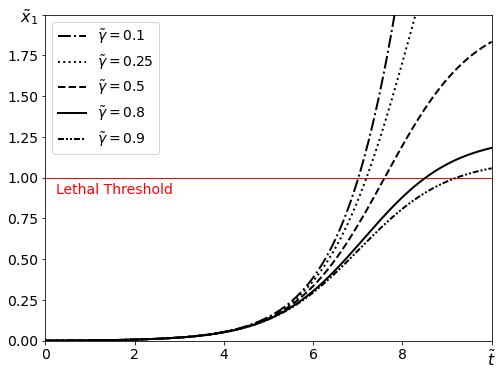

In [6]:
plt.figure()

fig, axs = plt.subplots(1,1,figsize=(8,6))

styls = ['-.',':','--','-']
names = [r'$\tilde{\gamma}=0.1$',r'$\tilde{\gamma}=0.25$',r'$\tilde{\gamma}=0.5$',r'$\tilde{\gamma}=0.8$',r'$\tilde{\gamma}=0.9$']

for i in range(5):
    if i < 4:
        axs.plot(t, x_vecs[i],'k',linestyle=styls[i],linewidth=2,label=names[i])
    else:
        axs.plot(t,x_vecs[4],'k',linestyle=(0, (3, 1, 1, 1, 1, 1)),linewidth=2,label=names[4])
    
axs.hlines(1,0,15,'r',linestyle='-',linewidth=1)

axs.legend(fontsize='14')

axs.set_xlim(0,10)
axs.set_ylim(0,2)

axs.set_yticks([0.00,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00])
axs.set_yticklabels(['0.00','0.25','0.50','0.75','1.00','1.25','1.50','1.75',r'$\tilde{x}_1$'],fontsize=14)

axs.set_xticks([0,2,4,6,8,10])
axs.set_xticklabels(['0','2','4','6','8',r'$\tilde{t}$'],fontsize=14)

axs.get_xticklabels()[-1].set_fontsize(16)
axs.get_yticklabels()[-1].set_fontsize(16)

axs.text(0.25,0.9,'Lethal Threshold',fontsize=14,color='r')